<a href="https://colab.research.google.com/github/alek00sandra/techniki-obrazowania/blob/main/obrazowanie_medyczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Operacje podstawowe, gradient, filtracja

In [2]:
import numpy as np # Podstawowa biblioteka numeryczna
import matplotlib.pyplot as plt # Biblioteka do wizualizacji 2D
import scipy.signal as signal # Podstawowe funckcje przetwarzania sygnałów
import scipy.ndimage as nd # Podstawowe funkcje przetwarzania obrazów
from skimage import io
from skimage import color
%matplotlib inline

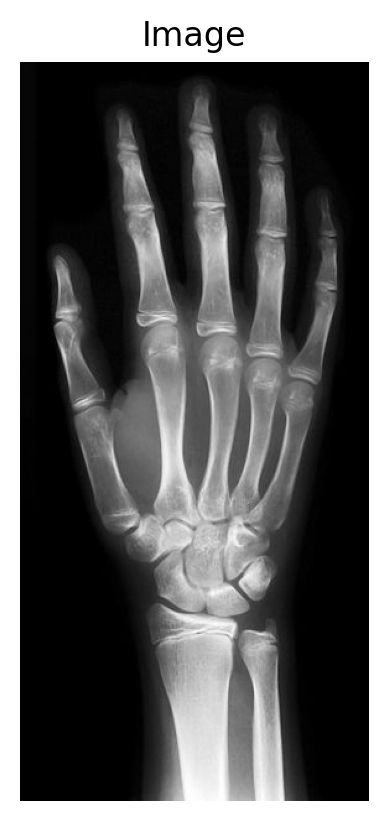

In [6]:
image = io.imread("xray.png")
image = color.rgb2gray(image) # Konwersja do przestrzeni szarości
image = (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalizacja do zakresu [0-1]
plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.show()

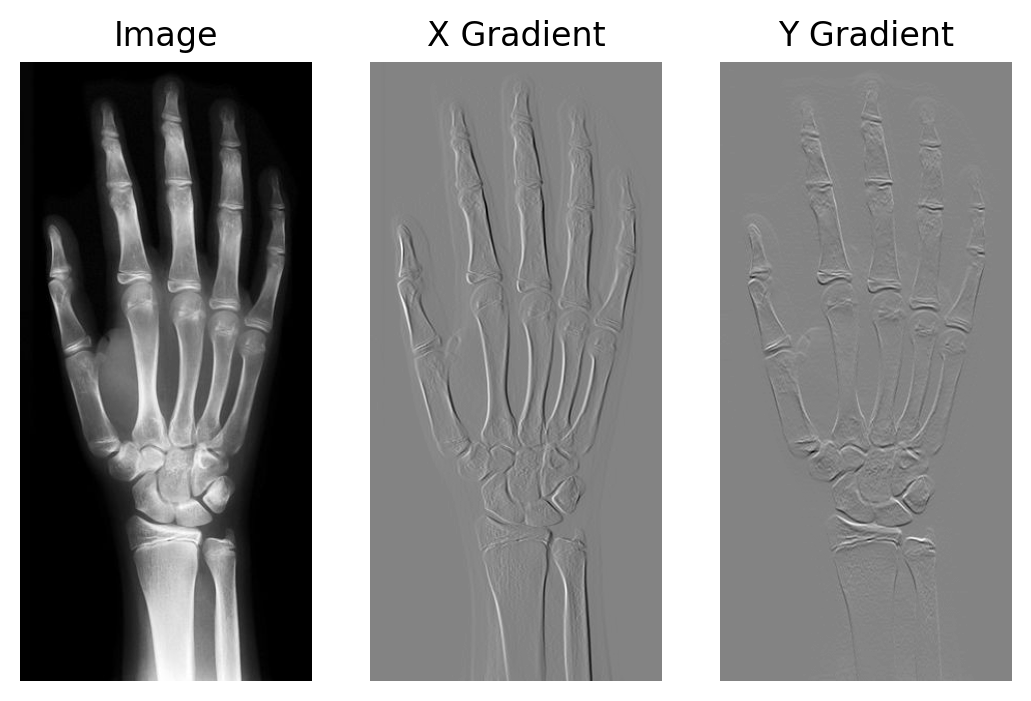

In [7]:
#gradient to filtr gornoprzepustowy, bo przepuszcza miejsca o wysokiej zmianie koloru (tam gdzie staly kolor albo niewielka zmiana to blokuje
#funkcja np.gradient zwraca krotkę -> pierwszy element to gradient wzdłóż osi y a drugi wzdłóż osi x
#gradient X - zmiany wertykalne (różnice horyzontalne) gradnient y - zmiany horyzontalne (bo różnica wertykalna)
"""
G(I(x, y)) = [dI(x, y)/dx, dI(x, y)/dy]
image[y, x]
"""

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(x_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(y_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

własna funkcję do obliczenia gradientu 

In [8]:
def our_gradient(image, mode):
  gradient_y = np.zeros_like(image) #zmienne maja taki sam rozmiar jak obraz wejsciowy (czyli robimy czarny obraz wielkosci wjsciowego z zer)
  gradient_x = np.zeros_like(image)
  if(mode=="central"):
    gradient_y[1:-1, :] = (image[2:, :] - image[0:-2, :]) / 2.0
    gradient_x[:, 1:-1] = (image[:, 2:] - image[:, 0:-2]) / 2.0 #central
  if(mode=="forward"):
      gradient_y[0,:] = (image[1,:] - image[0,:])/1.0
      gradient_x[:,0] = (image[:,1] - image[:,0])/1.0  #forward, dla zerowego elem idziemy wprzód 
  if(mode == "backward"):
        gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1.0
        gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1.0 #backward, dla ostatniego elem cofamy się w tył
  return gradient_y, gradient_x

In [9]:
np.random.seed(123)
rand_image = np.random.randn(5, 5)
y_numpy, x_numpy = np.gradient(rand_image)
y_forward, x_forward = our_gradient(rand_image, "forward")
y_central, x_central = our_gradient(rand_image, "central")
y_backward, x_backward = our_gradient(rand_image, "backward")
print("Y_numpy, X_numpy: ")
print(y_numpy)
print(x_numpy)
print("Y_forward, X_forward: ")
print(y_forward)
print(x_forward)
print("Y_central, X_central: ")
print(y_central)
print(x_central)
print("Y_backward, X_backward: ")
print(y_backward)
print(x_backward)

Y_numpy, X_numpy: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.20337223 -0.54602721  0.60420556  0.43369636  0.06730915]
 [-1.04289391  2.31630466  1.30784936 -0.13094118  0.6264634 ]
 [ 0.70812736  0.7927205  -1.21361175  0.90736552 -0.40494935]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]]
[[ 2.08297605  0.68430455 -1.25182008 -0.43078938  0.92769446]
 [-4.07811578 -1.04017458  1.84630775 -0.21891389 -2.13267666]
 [ 0.58417718  1.08513789 -0.27209651 -0.96768579  0.19492004]
 [ 2.64028136  1.31056868 -0.60093809 -0.90029984 -0.6178675 ]
 [ 0.75336345 -0.83660122 -0.15745149 -0.1590234  -2.42970971]]
Y_forward, X_forward: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.08297

przybliżenie gradientu za pomocą filtrów Sobela i Prewitta (zwróć uwagę na różnice między konwolucją, a korelacją).

In [10]:


def sobel_gradient(image):
  # TO DO
    sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
  ])

    sobel_y = sobel_x.T

    gradient_x = signal.correlate2d(image, sobel_x)
    gradient_y = signal.correlate2d(image, sobel_y)

    return gradient_y, gradient_x

def prewitt_gradient(image):
  # TO DO
    prewitt_x = np.array([
      [-1,0,1],
      [-1,0,1],
      [-1,0,1]
    ])

    prewitt_y = prewitt_x.T

    gradient_x = signal.correlate2d(image, prewitt_x)
    gradient_y = signal.correlate2d(image, prewitt_y)

    return gradient_y, gradient_x

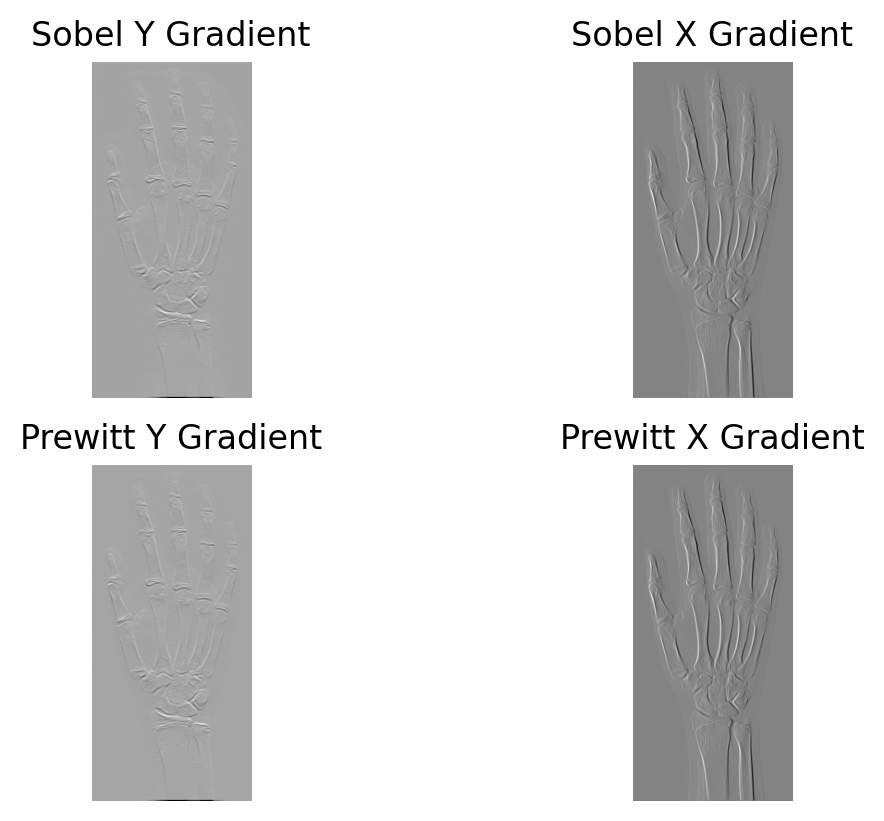

In [11]:
sobel_y_gradient, sobel_x_gradient = sobel_gradient(image)
prewitt_y_gradient, prewitt_x_gradient = prewitt_gradient(image)

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(sobel_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel Y Gradient")
plt.subplot(2, 2, 2)
plt.imshow(sobel_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel X Gradient")
plt.subplot(2, 2, 3)
plt.imshow(prewitt_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y Gradient")
plt.subplot(2, 2, 4)
plt.imshow(prewitt_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt X Gradient")
plt.show()

<ipython-input-13-e1c6d74248bb>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(y_gradient/x_gradient)
<ipython-input-13-e1c6d74248bb>:8: RuntimeWarning: invalid value encountered in true_divide
  return np.arctan(y_gradient/x_gradient)


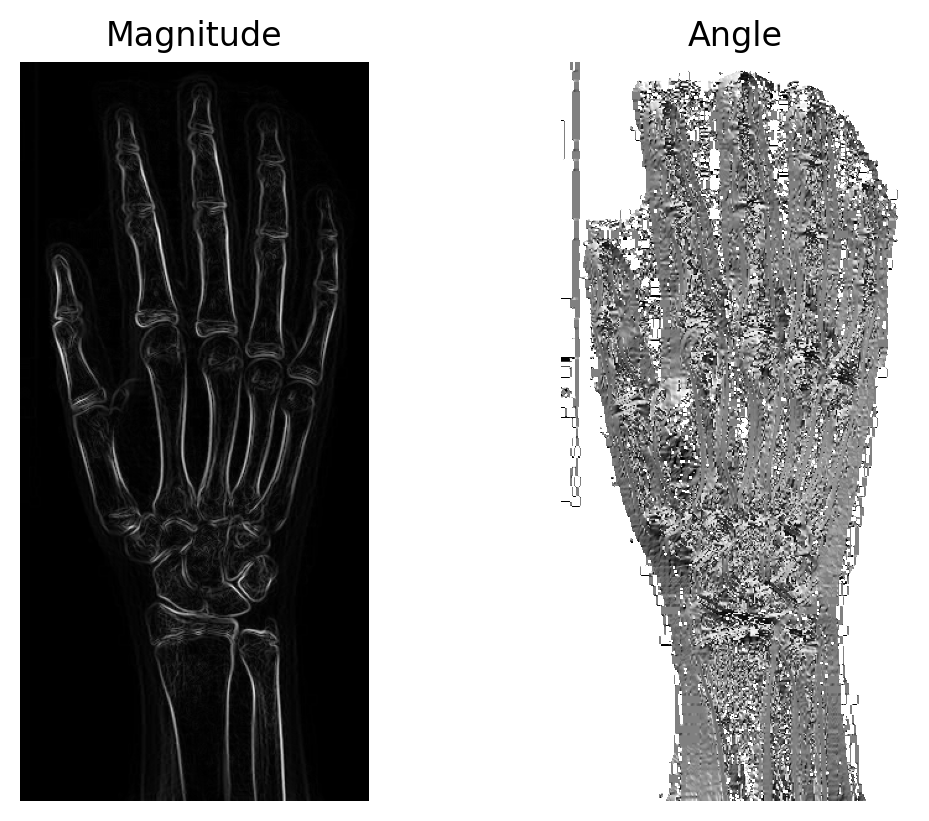

In [13]:
#magnituda gradientu np do wyznaczania krawędzi w obrazach, widać wszystkie zmiany intensywonsci (horyzontalnie , pod katem, wertykalnie)

def gradient_magnitude(x_gradient, y_gradient):
    # TO DO
  return np.sqrt(x_gradient*x_gradient+y_gradient*y_gradient)
def gradient_angle(x_gradient, y_gradient):
    # TO DO
  return np.arctan(y_gradient/x_gradient)

mag, angle = gradient_magnitude(x_gradient, y_gradient), gradient_angle(x_gradient, y_gradient)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.title("Magnitude")
plt.subplot(1, 2, 2)
plt.imshow(angle, cmap='gray')
plt.axis('off')
plt.title("Angle")
plt.show()

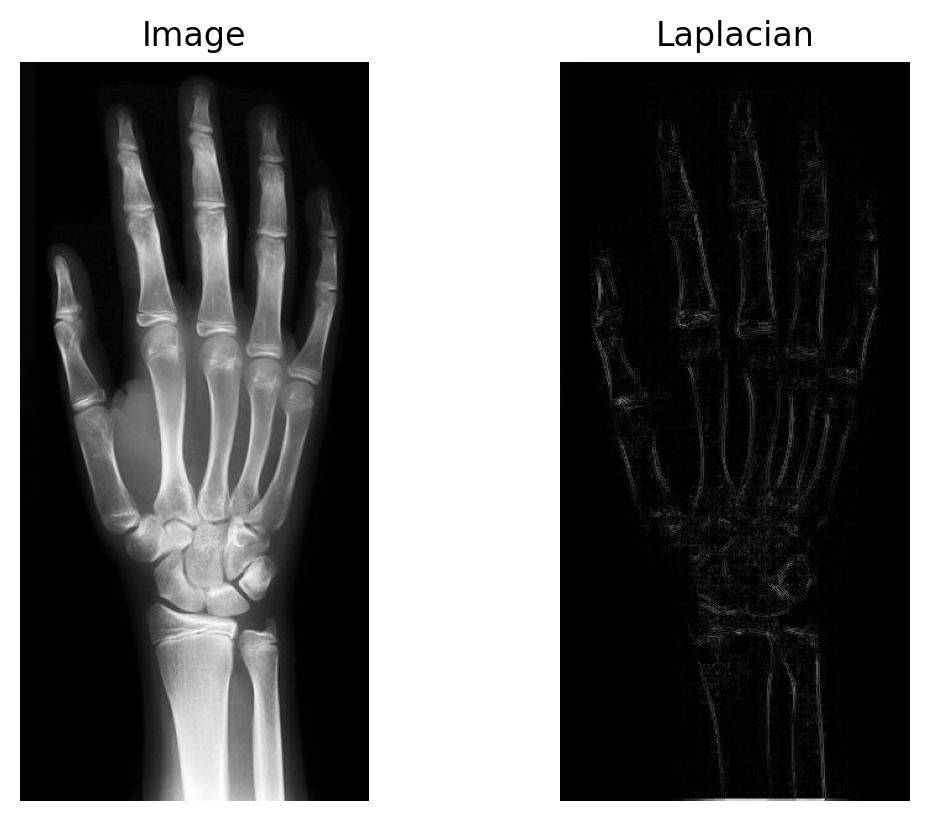

In [15]:
def laplace(image):
    # TO DO

  window = np.array([
                   [0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]
  ])
  laplacian_image = signal.correlate2d(image, window)
  return laplacian_image
laplacian_image = laplace(image)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.title("Laplacian")
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
%matplotlib inline

In [17]:
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
	image = np.zeros((y_size, x_size))
	
	for i in range(y_size):
		for j in range(x_size):
			if (j-x_origin)**2 + (i-y_origin)**2 <= radius*radius:
				image[i,j] = 1
			else:
				image[i,j] = 0
	return image

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	image = np.zeros((y_size, x_size))
	image[y_b:y_b+height, x_b:x_b+width] = 1

	return image

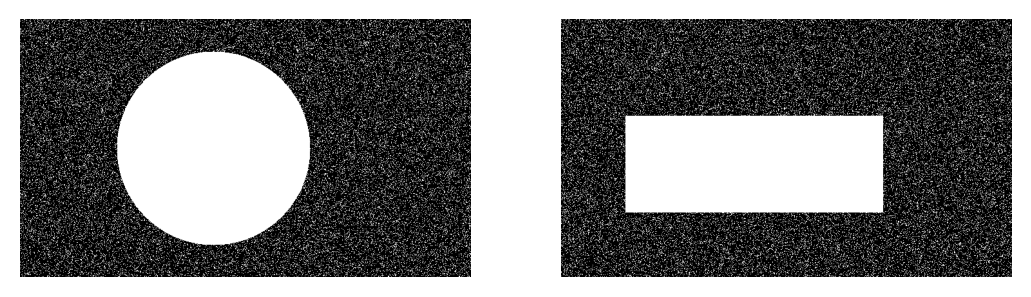

In [18]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

# Dodanie szumu do wizualizacji następnych funkcji
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

In [19]:


#EROZJA
def erosion(image, se):
	r,c=image.shape
	erosion_image=np.zeros((r,c))
	s=(se.shape[0]-1)//2
	for i in range(s,r-s):
		for j in range(s,c-s):
			kadr=image[i-s:i+s+1,j-s:j+s+1]
			img=kadr*se
			erosion_image[i,j]=np.min(img)
	return erosion_image

#DYLATACJA
def dilation(image, se):
	r,c=image.shape
	dilation_image=np.zeros((r,c))
	s=(se.shape[0]-1)//2	
	for i in range(s,r-s):
		for j in range(s,c-s):
			kadr=image[i-s:i+s+1,j-s:j+s+1]
			img=kadr*se
			dilation_image[i,j]=np.max(img)
	return dilation_image

#OTWARCIE
def opening(image, se):
	new_img  = erosion(image, se)
	opened_img = dilation(new_img, se)
	return opened_img
	pass
	
	
#ZAMKNIĘCIE
def closing(image, se):
	new_img = dilation(image, se)
	closed_img = erosion(new_img, se)
	return closed_img
	pass


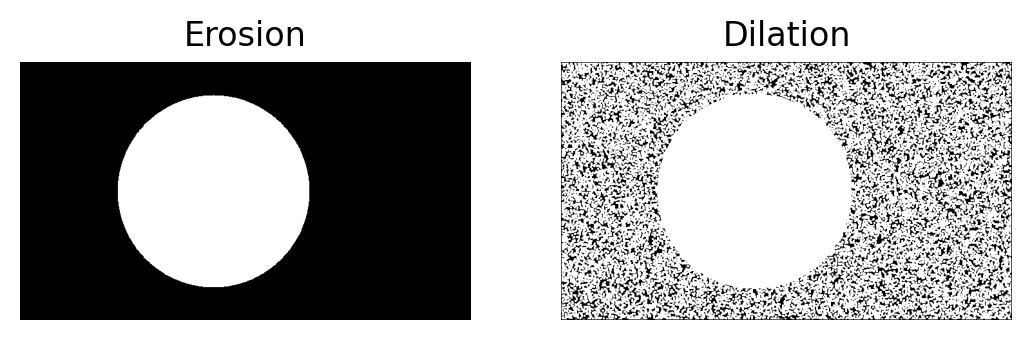

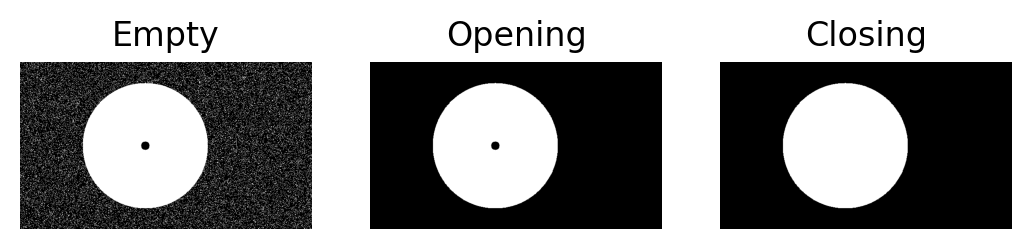

In [20]:
eroded_circle = erosion(circle, np.ones((3, 3)))
dilated_circle = dilation(circle, np.ones((3, 3)))

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
opened_circle = opening(empty_circle, np.ones((3, 3)))
closed_opened_circle = closing(opened_circle, np.ones((21, 21)))
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

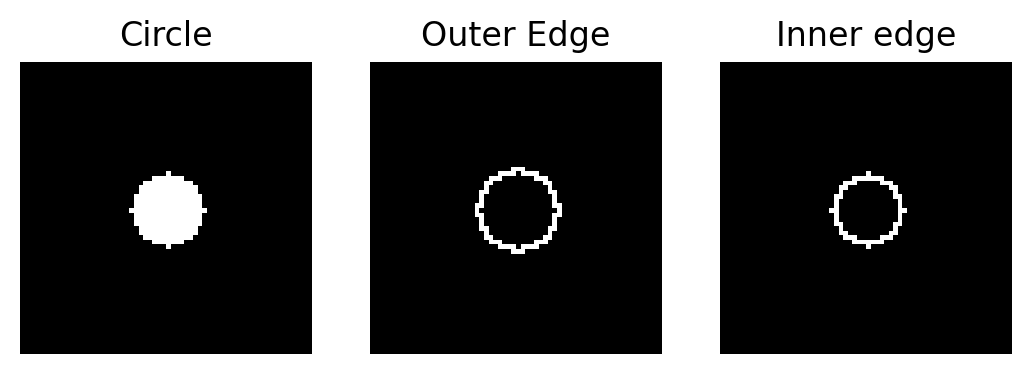

In [21]:
small_circle = generate_ciricle(64, 64, 32, 32, 8)

outer_edge = np.logical_and(nd.binary_dilation(small_circle, np.ones((3,3))), np.logical_not(small_circle))
inner_edge = np.logical_and(np.logical_not(nd.binary_erosion(small_circle, np. ones((3,3)))), small_circle)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.title("Circle")
plt.subplot(1, 3, 2)
plt.imshow(outer_edge, cmap='gray')
plt.axis('off')
plt.title("Outer Edge")
plt.subplot(1, 3, 3)
plt.imshow(inner_edge, cmap='gray')
plt.axis('off')
plt.title("Inner edge")
plt.show()

 zostaną zaimplementowane podstawowe operacje na histogramie obrazu oraz zostanie wykorzystana transformacja Fouriera obrazu (sygnału 2D)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
%matplotlib inline

#
image = (image - np.min(image)) / (np.max(image) - np.min(image))

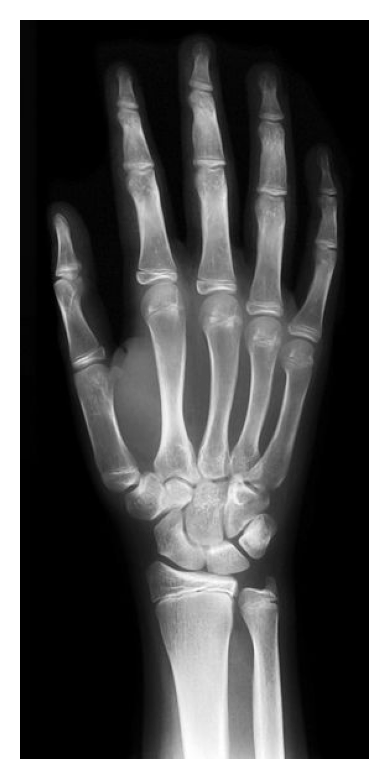

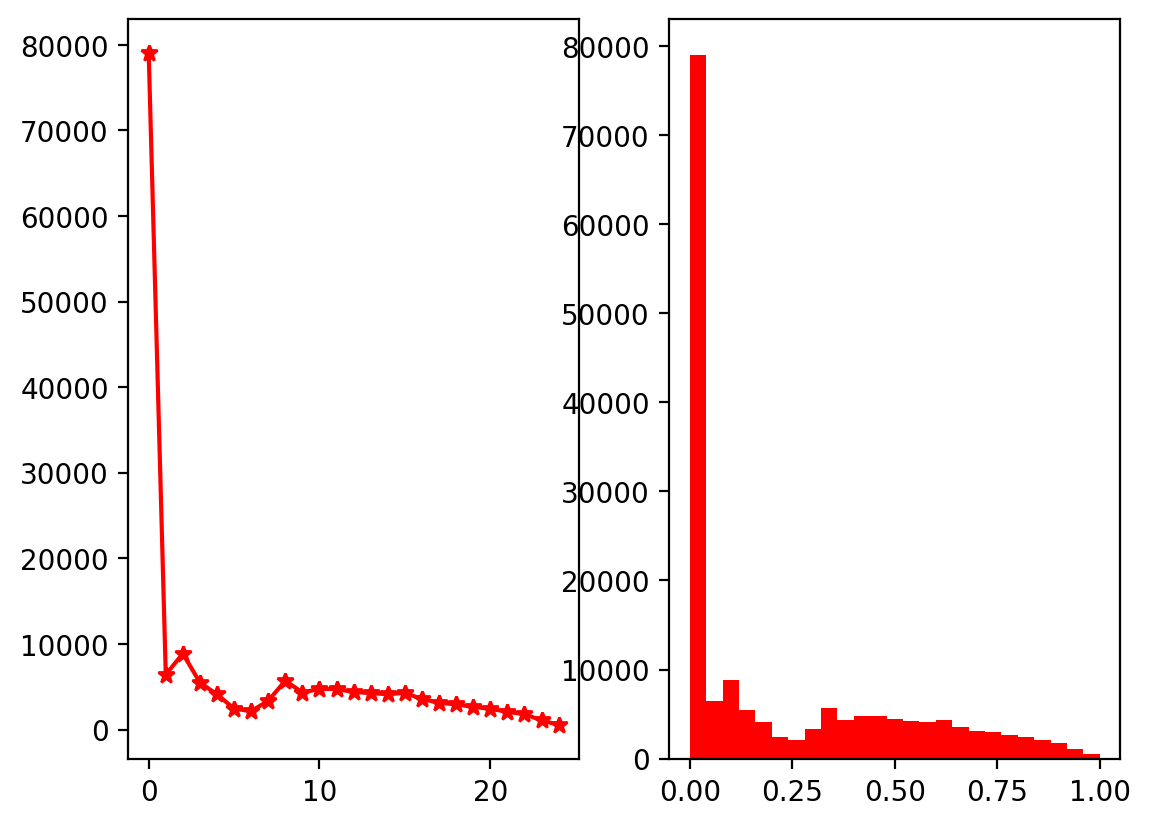

In [25]:
no_bins = 25
np_histogram, _ = np.histogram(image.ravel(), bins=no_bins)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.plot(np_histogram, "r*-")
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), color='red', bins=no_bins)
plt.show()

In [26]:
def our_hist(image, bins=100):

  unique,unique_counts=np.unique(image.ravel(),return_counts=True) #szukanie unikalnych elementów tablicy
  max_value,min_value=image.max(),image.min()
  diff=max_value-min_value
  histogram=np.zeros(bins)
  for i in range(len(histogram)):
    start_value=min_value+i*diff/bins
    end_value=min_value+(i+1)*diff/bins
    histogram[i]=np.sum(unique_counts[np.logical_and(unique>=start_value,unique<end_value)]) #suma wartości większych niż początkowy i mniejszych niż końcowy
    histogram[-1]+=unique_counts[-1]
  return histogram

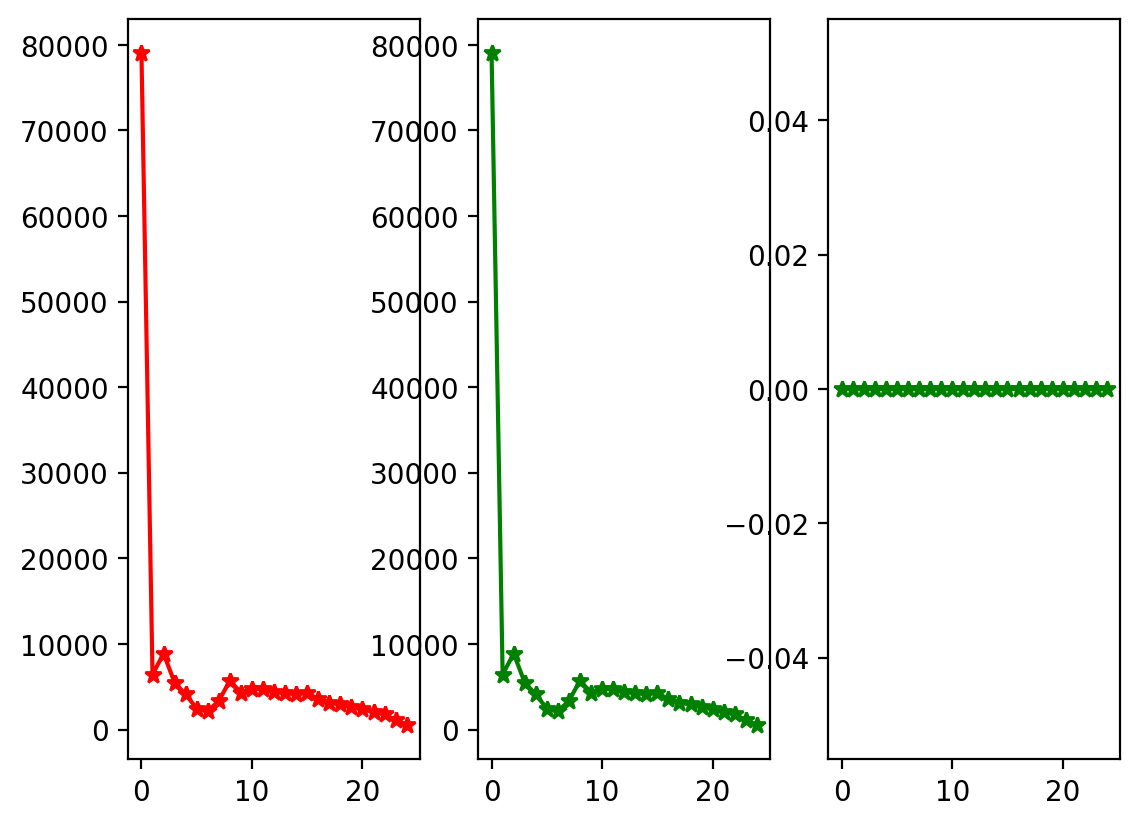

SAD:  0.0


In [27]:
our_histogram = our_hist(image.ravel(), bins=no_bins)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.plot(np_histogram, "r*-")
plt.subplot(1, 3, 2)
plt.plot(our_histogram, "g*-")
plt.subplot(1, 3, 3)
plt.plot(np.abs(np_histogram.ravel() - our_histogram), "g*-")
plt.show()

print("SAD: ", np.sum(np.abs(np_histogram.ravel() - our_histogram)))

zastosowanie i wizualizacja transformacji Fouriera obrazu. Stosując gotowe funkcje biblioteczne dokonaj następujących transformacji:

In [28]:

ft = np.fft.ifftshift(image)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fft_mag = np.sqrt(abs(ft))

ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
image_back = ift.real  

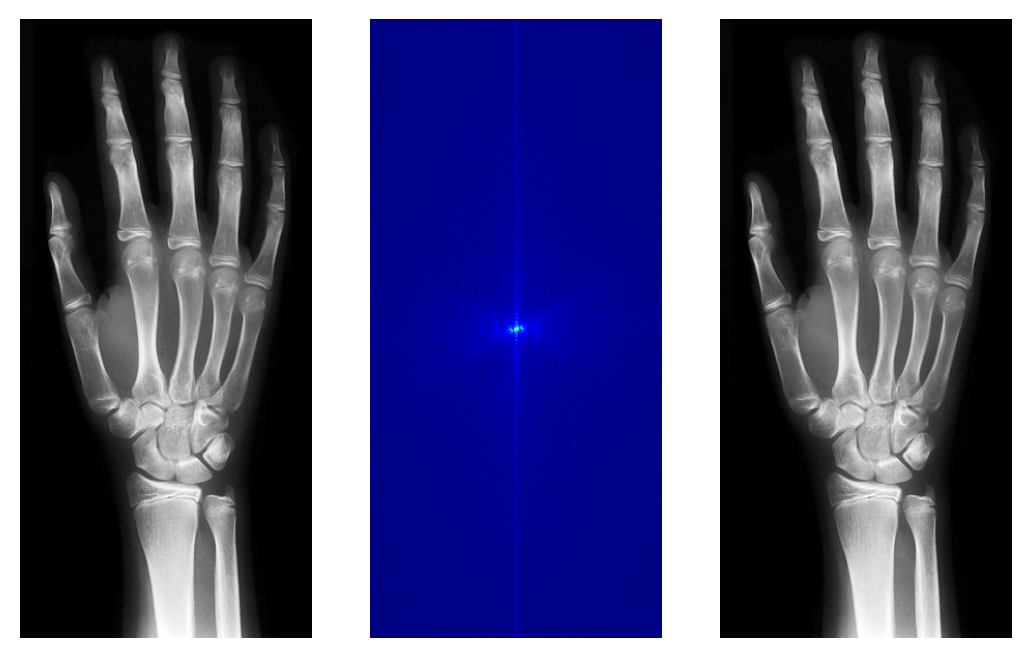

In [29]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(fft_mag, cmap='jet')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


Progowanie oraz algorytmy rozrostu obszarów w wersji lokalnej oraz globalnej. Są to najbardziej podstawowe algorytmy segmetnacji pochodzące jeszcze z XX wieku. 

In [30]:
import numpy as np
from scipy import ndimage
from skimage import color, io
import time
import matplotlib.pyplot as plt
import skimage.measure as measure
import queue # Do implementacji lokalnej wersji rozrostu obszarów
%matplotlib inline

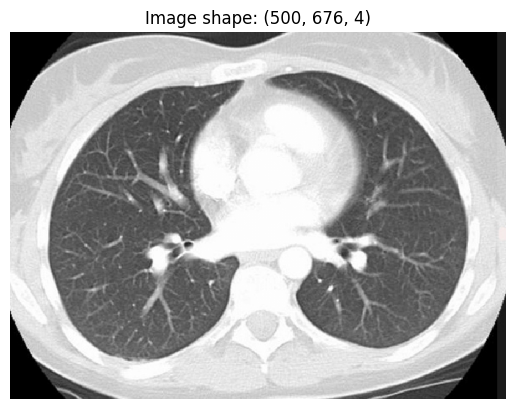

In [38]:
image = io.imread("CT_lungs.png")
def normalize(image):
    
    return (image - np.min(image))/(np.max(image) - np.min(image))

#image  = normalize(color.rgb2gray(io.imread('CT_lungs.png')))
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image shape: " + str(image.shape))
plt.show()

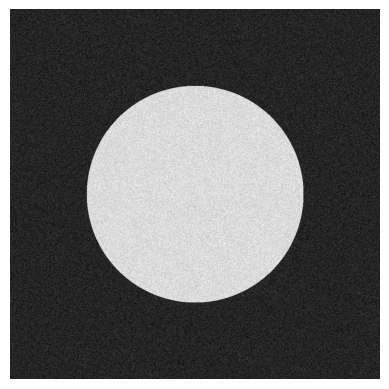

In [40]:
#Następnie wygenerujmy obraz koła i dodajmy do niego losowy szum i znormalizujmy do zakresu [0, 1]

def generate_circle(y_size, x_size, x_origin, y_origin, radius):
    image = np.zeros((y_size, x_size))
    x_grid, y_grid = np.meshgrid(np.arange(x_size), np.arange(y_size))
    indices = np.square((x_grid - x_origin)) + np.square((y_grid-y_origin)) < radius*radius
    image[indices] = 1
    return image

y_size = 1024
x_size = 1024
circle = generate_circle(y_size, x_size, 512, 512, 300)
circle = circle + (np.random.random((y_size, x_size))-0.5)*0.4
circle = normalize(circle)

plt.figure()
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.show()

In [41]:
def image_threshold(image, lower, upper):
    obraz = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            obraz[i,j] = 1.0 if image[i,j] >= lower and image[i,j] <=upper else 0.0
    return obraz

In [42]:
def image_threshold(image, lower, upper):
    obraz = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            obraz[i,j] = 1.0 if image[i,j] >= lower and image[i,j] <=upper else 0.0
    return obraz

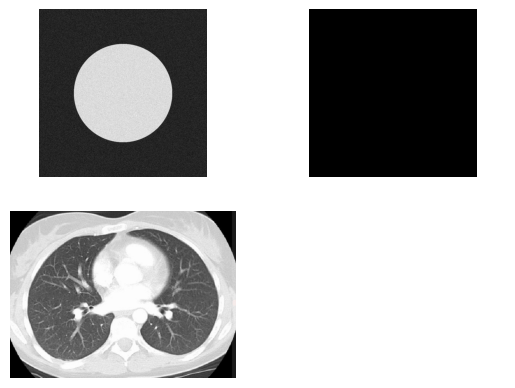

In [45]:
get_center = lambda image: (int(image.shape[0] / 2) - 1, int(image.shape[1] / 2) - 1)
circle_region_global = region_growing_global(circle, get_center(circle),  0.1, 0.1)
image_region_global = region_growing_global(image, get_center(image), 0.1, 0.1)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(circle_region_global, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_region_global, cmap='gray')
plt.axis('off')
plt.show()

Ostatnim algorytmem do implementacji jest algorytm rozrostu obszarów w wersji lokalnej

4


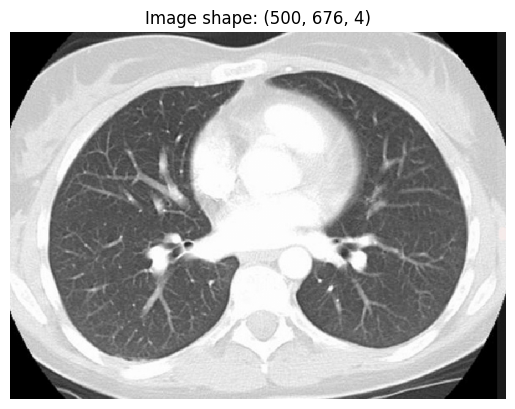

In [48]:
def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))
image=normalize(io.imread('CT_lungs.png'))
#image  = normalize(color.rgb2gray(io.imread('CT_lungs.png')))
x,y,channels=image.shape
print(channels)
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image shape: " + str(image.shape))
plt.show()

In [49]:
images = [color.rgb2gray(io.imread("CT_lungs.png")[:,:,:3])]
print(len(images))
size=len(images)
print(size)
for item in images:
  print(item)
a=np.array([1,2,3,4])
print(a[:3])
print(image.max())

1
1
[[0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 ...
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]
 [0.         0.         0.         ... 0.10196078 0.10196078 0.10196078]]
[1 2 3]
1.0


In [50]:
import scipy.signal as signal
from scipy import ndimage
def gaussian_smoothing(image, sigma):
  filter_size = np.floor(2.54 *sigma)
  if(filter_size%2==0):
    filter_size=int(filter_size+1)
  else:
    filter_size=int(filter_size)
  print(filter_size)
  gaussian_filter = np.zeros(((filter_size, filter_size,filter_size)))
  m = filter_size//2
  n = filter_size//2
  v=filter_size//2
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      for z in range(-v,v+1):
        x1 = np.sqrt((2*np.pi)**3)*(sigma**3)
        x2 = np.exp(-(x**2 + y**2+z**2)/(2* sigma**2))
        
        gaussian_filter[x+m, y+n, z+v] = (1/x1)*x2
        
  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered = ndimage.convolve(image, gaussian_filter)
  return im_filtered

In [51]:
import scipy.signal as signal
from scipy import ndimage
def gaussian_smoothing1(image, sigma):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size,filter_size), np.float32)
  m = filter_size//2
  n = filter_size//2
  v=filter_size//2
  for k in range(channels-3):
    for x in range(-m, m+1):
      for y in range(-n, n+1):
        x1 = 2*np.pi*(sigma**2)
        x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
        gaussian_filter[x+m, y+n] = (1/x1)*x2
  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered = ndimage.convolve(image, gaussian_filter)
  return im_filtered

In [52]:
from scipy import signal as scs
from scipy import ndimage
def gaussian_smoothing2(image, sigma):
  filter_size = np.ceil(sigma*2.54) // 2 * 2 + 1
  
  if(filter_size%2==0):
    filter_size=int(filter_size+1)
  else:
    filter_size=int(filter_size)
  print(filter_size)
  gaussian_filter = np.zeros((filter_size*2, filter_size*2), np.float32)
  m = filter_size
  n = filter_size
  for i in range(-m,m+1):
    for j in range(-n,n+1):
      x1 = 2.0*np.pi*(sigma**2)
      x2 = np.exp(-(i**2 + j**2)/(2.0* sigma**2))
      gaussian_filter[i+m-1,j+n-1]=(1/x1)*(x2)
  print("Smoothing mine:",np.size(gaussian_filter))
  return scs.convolve2d(image,gaussian_filter)

In [53]:
def gaussian_smoothing3(image, sigma):
    size = np.ceil(sigma*2.54) // 2 * 2 + 1
    range = np.arange(-size,size+1)
    x,y = np.meshgrid(range,range)
    normal = 1 / (2.0 * np.pi * sigma**2)
    g_kernel =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    print("Smoothing Wiki:",np.size(g_kernel))
    return scs.convolve2d(image,g_kernel)

9
Smoothing mine: 324
Smoothing Wiki: 361


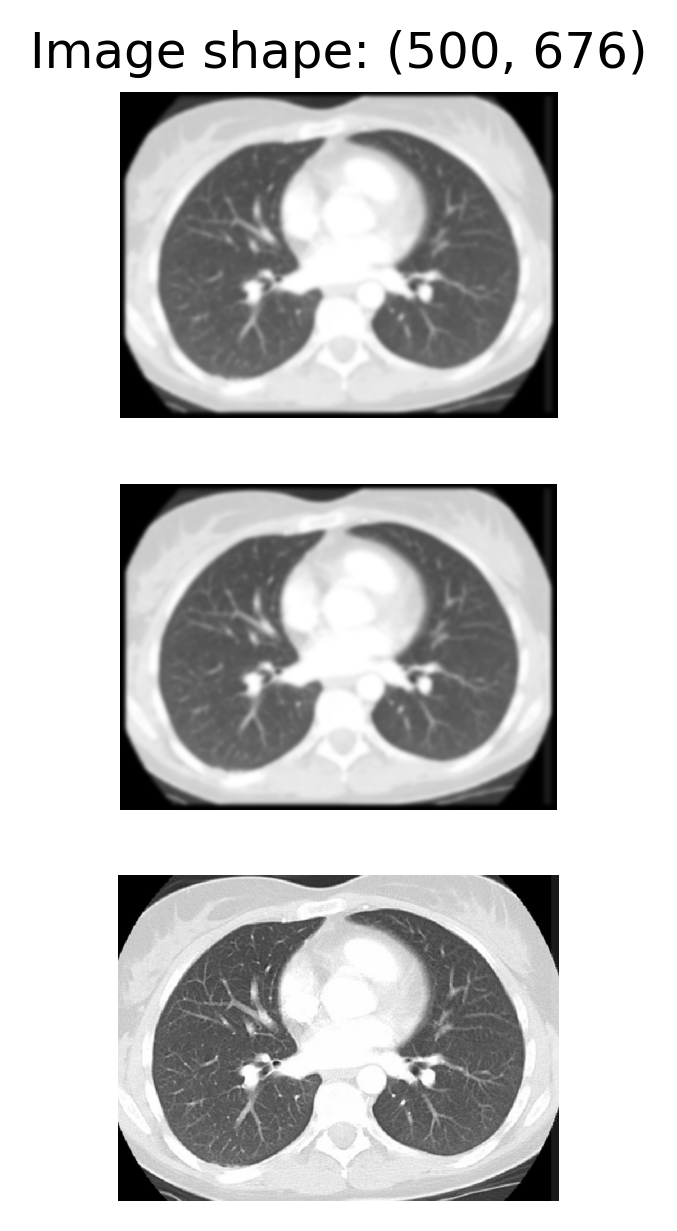

In [54]:
for image in images:
  x1=gaussian_smoothing2(image,3)
  z1=gaussian_smoothing3(image,3)
  y1=[x1[:,:]]
  plt.figure(dpi=300)
  plt.subplot(3,1,1)
  plt.imshow(x1,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.subplot(3,1,2)
  plt.imshow(z1,cmap='gray')
  plt.axis('off')
  plt.subplot(3,1,3)
  plt.imshow(image,cmap='gray')
  plt.axis('off')

In [55]:
def calculate_gradients(image):
    
    window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
    ])

    window_y = window_x.T

    gradient_x = signal.correlate2d(image, window_x)
    gradient_y = signal.correlate2d(image, window_y)

    gradient_magnitude = np.zeros(image.shape)
    mag = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_angle = np.zeros(image.shape)
    ang = np.arctan2(gradient_y,gradient_x)
    gradient_magnitude=mag
    gradient_angle=ang
    
    return gradient_magnitude, gradient_angle

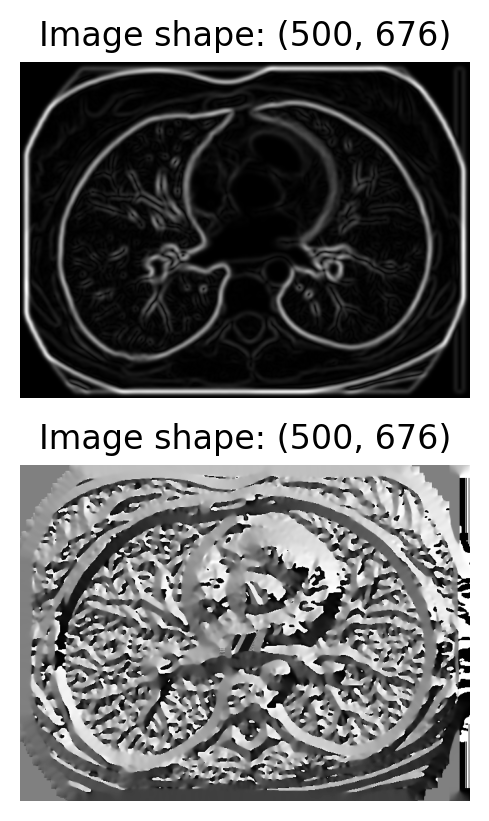

In [56]:
import scipy.signal as signal
from scipy import ndimage
for image in images:
  x,y=calculate_gradients(z1)
  plt.figure(dpi=200)
  plt.subplot(2,1,1)
  plt.imshow(x,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.subplot(2,1,2)
  plt.imshow(y,cmap='gray')
  plt.axis('off')
  plt.title("Image shape: " + str(image.shape))
  plt.show()

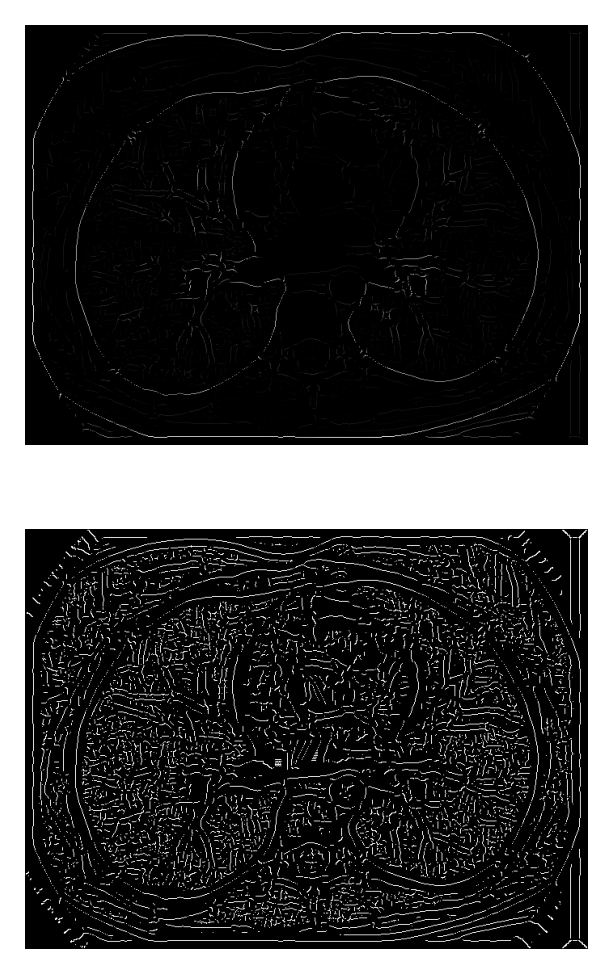

(520, 696)


In [57]:

import matplotlib as mpl
def non_maximum_supression(gradient_magnitude, gradient_angle):
    """
    TO DO - funkcja powinna wyznaczyć potencjalnie krawędzie korzystając z magntiudy i kąta gradientu
    0.5p
    """
    y_size,x_size = gradient_magnitude.shape
    potential_edges = np.zeros(gradient_magnitude.shape)
    angle = gradient_angle * 180 / np.pi
    angle[angle < 0] += 180

    for i in range(1,y_size-1):
        for j in range(1,x_size-1):
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    px0 = gradient_magnitude[i, j+1]
                    px1 = gradient_magnitude[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    px0 = gradient_magnitude[i+1, j-1]
                    px1 = gradient_magnitude[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    px0 = gradient_magnitude[i+1, j]
                    px1 = gradient_magnitude[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    px0 = gradient_magnitude[i-1, j-1]
                    px1 = gradient_magnitude[i+1, j+1]

                if (gradient_magnitude[i,j] >= px0) and (gradient_magnitude[i,j] >= px1):
                    potential_edges[i,j] = gradient_magnitude[i,j]
                else:
                    potential_edges[i,j] = 0
    return potential_edges
u=non_maximum_supression(x,y)
v1=non_maximum_supression(x,y)
x_size,y_size=u.shape
for i in range(x_size):
  for j in range(y_size):
    if v1[i,j]!=0:
      v1[i,j]=1
plt.figure(dpi=250)
plt.subplot(2,1,1)
plt.imshow(u,vmin=0,vmax=1,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(v1,vmin=0,vmax=1,cmap='gray')
plt.axis('off')
plt.show()
print(u.shape)